In [12]:
from dolfin import *
import mshr
import matplotlib
import matplotlib.pyplot as plt

First create a simple FEM mesh of a circle:

In [22]:
n=40
geometry=mshr.Circle(Point(0.0,0.0),1.0)
mesh = mshr.generate_mesh(geometry,n)

Lets compute the eigenfunctions on this circle, and then deform it by stretching in the x-axis to form longer and longer elipses. Here we can see how the domain geometry affects the form of the eigenfunctions:

Discrete space size: 3287
99.6054661555 0.0


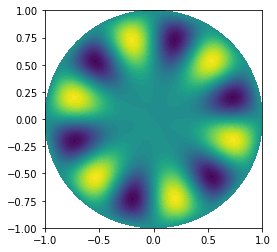

Discrete space size: 3287
81.380225827 0.0


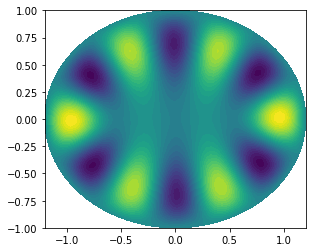

Discrete space size: 3287
68.5390036735 0.0


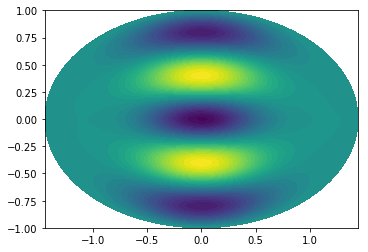

Discrete space size: 3287
59.5913294661 0.0


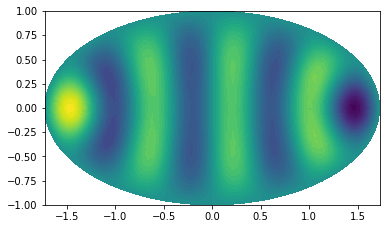

Discrete space size: 3287
49.876384034 0.0


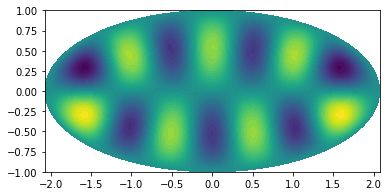

In [23]:
k = 19 #Which eigenfuncion should we plot, in order of smallest magnitude eigenvalue
ns = 5 #Number of times to stretch the circle

for i in range(ns):
    V = FunctionSpace(mesh, 'Lagrange', 1)
    bc = DirichletBC(V, 0.0, DomainBoundary())
    u, v = TrialFunction(V), TestFunction(V)

    a = inner(grad(u), grad(v))*dx
    L = Constant(0.0)*v*dx
    m = u*v*dx

    A, _ = assemble_system(a, L, bc)
    B = assemble(m)

    print "Discrete space size: %d"%V.dim()
    eigensolver = SLEPcEigenSolver(as_backend_type(A), as_backend_type(B))
    #prm = eigensolver.parameters
    #info(prm, True)
    eigensolver.parameters['spectrum'] = 'smallest magnitude'

    eigensolver.solve(20)
    eig = Function(V)
    eig_vec = eig.vector()
    
    r, c, rx, cx = eigensolver.get_eigenpair(k)
    eig_vec[:] = rx
    print r, c
    plot(eig)
    plt.show()
    
    # Stretch the domain by 20% in x-axis
    mesh.coordinates()[:,0] *= 1.2